<a href="https://colab.research.google.com/github/ansiyo/Machine-Learning-Rep/blob/main/PracticeTimeseries22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df=pd.read_csv('/content/e-waste realdata.csv')

In [ ]:
df.head()

,Date,County,Street/Area Name,latitude,longitude,Site No.,E-waste,Total
0,27/12/2024,Kilifi,Vescon Mtwapa,-3.923442,39.749668,1,Television,10
1,27/12/2024,Kilifi,Vescon Mtwapa,-3.923518,39.750456,3,Vedio game,15
2,27/12/2024,Kilifi,Vescon Mtwapa,-3.923857,39.751584,2,Router cable,20
3,28/12/2024,Kilifi,Kikambala Estate,-3.889410,39.769400,1,Television,25
4,28/12/2024,Kilifi,Elsek Estate,-3.889743,39.769756,5,Android phone,30


In [ ]:
df.shape

(16, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              16 non-null     object 
 1   County            16 non-null     object 
 2   Street/Area Name  16 non-null     object 
 3   latitude          16 non-null     float64
 4   longitude         16 non-null     float64
 5   Site No.          16 non-null     int64  
 6   E-waste           16 non-null     object 
 7   Total             16 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.1+ KB


In [ ]:
df.dropna()

,Date,County,Street/Area Name,latitude,longitude,Site No.,E-waste,Total
0,27/12/2024,Kilifi,Vescon Mtwapa,-3.923442,39.749668,1,Television,10
1,27/12/2024,Kilifi,Vescon Mtwapa,-3.923518,39.750456,3,Vedio game,15
2,27/12/2024,Kilifi,Vescon Mtwapa,-3.923857,39.751584,2,Router cable,20
3,28/12/2024,Kilifi,Kikambala Estate,-3.889410,39.769400,1,Television,25
4,28/12/2024,Kilifi,Elsek Estate,-3.889743,39.769756,5,Android phone,30
5,29/12/2024,Kilifi,Ndonya,-3.916364,39.751340,3,Computer keyboard,35
6,29/12/2024,Kilifi,Ndonya,-3.916071,39.751370,2,Android phone,40
7,29/12/2024,Kilifi,Ndonya,-3.916322,39.752218,3,Vedio game,45
8,29/12/2024,Kilifi,Ndonya,-3.918207,39.750745,4,Mobile phone,50
9,10/01/2025,Kajiado,Ole Polos,-1.345088,36.670940,2,PC Mouse,55


In [ ]:
df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Total')

<ipython-input-33-0130fac1594b>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Total')


In [ ]:
df = df.asfreq('D')

ConversionError: Failed to convert value(s) to axis units: array([NaT], dtype=object)

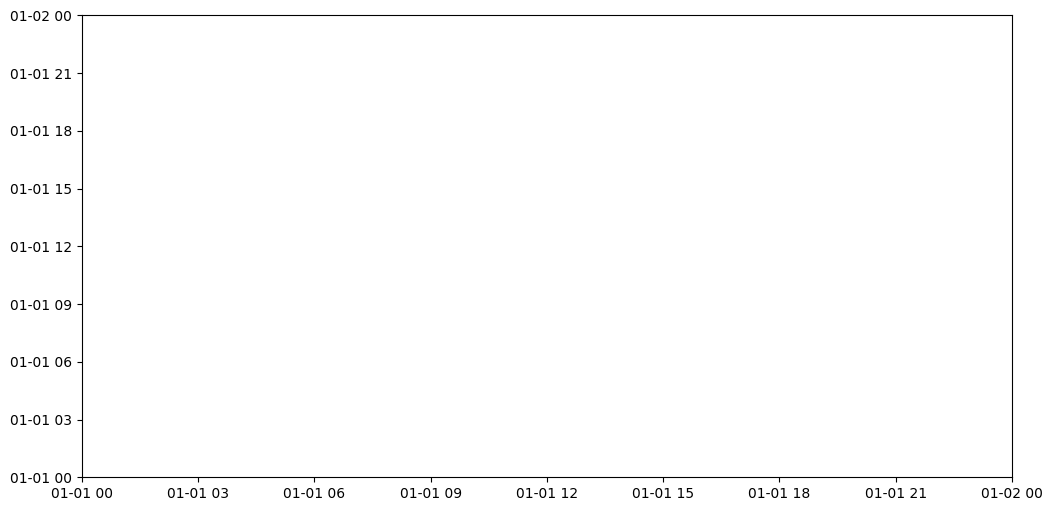

In [ ]:
# Visualize the original time series
plt.figure(figsize=(12, 6))
plt.plot(df, label='Total')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Site No.')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, parsing the 'Date' column as datetime and setting it as the index
df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Date')

# Handle missing values (choose one of the options below)
# Option 1: Drop rows with missing values
df = df.dropna()
# Option 2: Fill missing values with a specific value (e.g., 0)
# df = df.fillna(0)
# Option 3: Forward fill missing values
# df = df.ffill()

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], label='Total')  # Plot 'Total' column against the 'Date' index
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

<ipython-input-22-909f793b0532>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Date')


KeyError: 'Date'

<Figure size 1200x600 with 0 Axes>

<ipython-input-23-471f65db9beb>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Date')


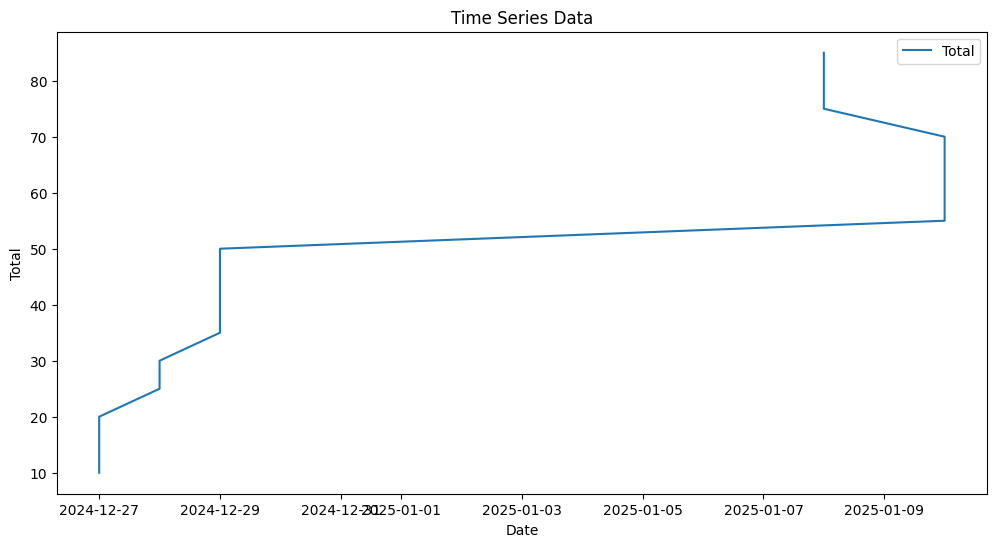

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data, parsing the 'Date' column as datetime and setting it as the index
df = pd.read_csv('/content/e-waste realdata.csv', parse_dates=['Date'], index_col='Date')

# Handle missing values (choose one of the options below)
# Option 1: Drop rows with missing values
df = df.dropna()
# Option 2: Fill missing values with a specific value (e.g., 0)
# df = df.fillna(0)
# Option 3: Forward fill missing values
# df = df.ffill()

# Visualize the time series data
plt.figure(figsize=(12, 6))
#plt.plot(df['Date'], label='Total')  # Plot 'Total' column against the 'Date' index - This line caused error because 'Date' is now index.
plt.plot(df['Total'], label='Total')  # Plot 'Total' column against the 'Date' index (which is now the DataFrame's index)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

In [ ]:
data.dropna()

,date,value
0,2022-01-01,10
1,2022-01-02,20
2,2022-01-03,30
4,2022-01-05,50


In [ ]:
# Visualize the original time series
plt.figure(figsize=(12, 6))
#plt.plot(df, label='value') # This line was causing error. DataFrame 'df' contains multiple columns, causing confusion for plot function
plt.plot(df['date'], label='value') # Assuming "Total" is your value column. Replace with actual column name if necessary.
plt.title('Time Series Data')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.show()

KeyError: 'date'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.plot(df['date'], label='value')

KeyError: 'date'